In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import des données

In [37]:
data = pd.read_excel('data/titanic.xls')

In [32]:
# Permet de regarder la taille de notre pandas dataframe (1309 lignes, et 14 colonnes)
data.shape

(1309, 14)

In [33]:
# Pour regarder les colonnes de notre dataframe
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [34]:
# Permet d'avoir les 1ère lignes de notre dataframe afin de vérifier que nos données ont bien été chargées
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [38]:
# Il est possible également de supprimer très rapidement les colonnes qui ne seront pas utiles dans la mise en place
# du modèle machine learning
data = data.drop(["name", "sibsp", "parch", "ticket", "fare", "cabin", "embarked", "boat", "body", "home.dest"],axis=1)

In [41]:
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


On peut obtenir des statistiques de bases sur chaque colonne de notre dataset avec la fonction "describe"
On peut observer par exemple que le passager le plus jeune avait moins d'un an (0.1667 an) alors que le passager le plus agé avait 80 ans
Nous pouvons également observer le nombre de valeur par colonne, et ainsi voir que la colonne age n'est pas complète, car nous avons seulement "1046" valeurs alors que notre dataframe possède 1309 lignes.

In [44]:
data.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


Pour traiter ces données manquantes, il y a deux possibilités: 

- Soit nous remplaçons ces valeurs par une valeur moyenne ou médiane. Il faut noter que en faisant cette manipulation nous allons "corrompre" notre dataframe car il est possible que la réalité soit tout autre. (data['age'].mean())
- Soit nous pouvons supprimer les lignes ne possédant pas ces informations (data.dropna(axis=0))

In [45]:
data = data.dropna(axis=0)

In [48]:
# Suite à la suppression des valeurs manquantes, on observe que notre dataframe fait désormais 1046 lignes
data.shape

(1046, 4)

Avec la fonction "value_counts" on peut obtenir la répartition de nos données en fonction des différentes valeurs d'une colonne.
Par exemple, nous pouvons regarder la répartition des passagers dans les différentes classes

In [49]:
data['pclass'].value_counts()

3    501
1    284
2    261
Name: pclass, dtype: int64

On peut également très facilement convertir cette information en graphique :

<AxesSubplot:>

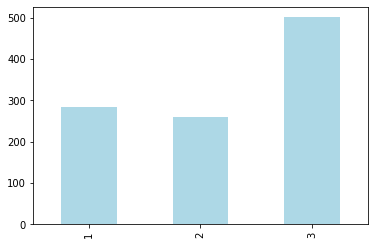

In [56]:
data['pclass'].value_counts().plot.bar(color='lightblue')

<AxesSubplot:>

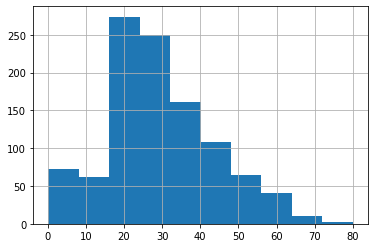

In [58]:
# On peut également observer la répartition des ages au niveau du titanic
data['age'].hist()

On peut utiliser "groupby" pour faire une analyse par "groupe" par exemple selon leur sexe (M ou F)
On peut faire cette analyse par rapport à la moyenne, la médiane, le max, le min... etc...

Nous observons que les hommes avaient en moyenne 30.6 ans et les femmes 28.7 ans et que les femmes ont survécu 75% en moyenne alors que seulement 20% des hommes en moyenne.

In [64]:
data.groupby(['sex']).mean()

,pclass,survived,age
sex,,,
female,2.048969,0.752577,28.687071
male,2.300912,0.205167,30.585233


On peut également enrichir ces informations en rajoutant la variable "pclass" indiquant dans quelle catégorie se trouvait le passager :

- Dans le cas ci-dessous, on observe que 96% des femmes en moyenne, en catégorie 1, ont survécu au naufrage.
- Seulement 35% des hommes en moyenne, en catégorie 1, ont survécu au naufrage.

In [65]:
data.groupby(['sex','pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

In [69]:
data[data['age'] < 18]

,pclass,survived,sex,age
1,1,1,male,0.9167
2,1,0,female,2.0000
53,1,0,male,17.0000
54,1,1,male,11.0000
55,1,1,female,14.0000
...,...,...,...,...
1265,3,0,female,10.0000
1275,3,0,male,16.0000
1279,3,0,female,14.0000
1300,3,1,female,15.0000
